# 1. Business Understanding

Der Datensatz besteht aus den Angaben von Kunden, die bereits mit ihnen geflogen sind. Das Feedback der Kunden zu verschiedenen Kontexten und deren Flugdaten wurde konsolidiert. Der Hauptzweck dieses Datensatzes besteht darin, vorherzusagen, ob ein zukünftiger Kunde angesichts der Details der anderen Parameterwerte mit seinem Service zufrieden sein würde. Auch die Fluggesellschaften müssen wissen, auf welchen Aspekt der von ihnen angebotenen Dienstleistungen mehr Wert gelegt werden muss, um zufriedenere Kunden zu generieren.

# 2. Data and Data Understanding



## 2.1 Import of Relevant Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import seaborn as sns
import statsmodels.api as sm
import warnings
import random as rnd
import sklearn as sk
# Removes the deprecated warnings
warnings.filterwarnings('ignore')

## 2. Read Data

In [2]:
raw_data=pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Customer_Satisfaction_Airlines_data.csv')
raw_data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
raw_data.describe(include='all')

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
unique,2,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,satisfied,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71087,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,39.427957,NaN,NaN,1981.409055,2.838597,2.990645,2.851994,...,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,NaN,NaN,NaN,15.119360,NaN,NaN,1027.115606,1.392983,1.527224,1.443729,...,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,NaN,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,27.000000,NaN,NaN,1359.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,NaN,NaN,NaN,40.000000,NaN,NaN,1925.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,NaN,NaN,NaN,51.000000,NaN,NaN,2544.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


In [4]:
raw_data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

Der Datensatz besteht aus 129.880 Zeilen und 23 Attributen:

Voraussagendes Attribut: Zufriedenheit

Numerische Attribute: Alter,Flugdistanz,Sitzkomfort,Abflug-/Ankunftszeit günstig,Essen und Trinken,Lage des Gates,Wifi-Service an Bord,Unterhaltung an Bord,Online-Support,Einfachheit der Online-Buchung,Bordservice,Service in der Kabine, Gepäckabfertigung,Checkin-Service,Sauberkeit,Online-Boarding,Abflugverspätung in Minuten.

Kategoriale Attribute: Geschlecht, Kundentyp, Art der Reise, Klasse.

Das Attribut Ankunft in Minuten ist unausgewogen. Es könnte daran liegen, dass es null Werte enthält. Das muss geprüft werden.



In [6]:
# test for duplicates
raw_data[raw_data.duplicated(keep=False)]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes


No duplicates in data frame.

## 2.3 Data Cleaning

In [7]:
raw_data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In the attribute Arrival Delay in Minutes are 393 null values included

In [8]:
raw_data['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [9]:
# Remove zero values
raw_data_c=raw_data.copy()
raw_data.dropna(inplace=True)

In [10]:
raw_data.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [11]:
# remove zero values
# axis = 0 lines / axis = 1 coloums
data_no_mv = raw_data.dropna(axis=0)

All null values are removed.

## 2.4. Descriptive Analysis

In this part of the notebook, exploratory data analysis will be used to account for data understanding.

After removing the zero values, the data set consists of 129187 rows, one row describing each customer, and 21 columns defining the attributes of the customers. This data will be used to try to classify whether a customer is satisfied or not. For this purpose, the historical data contains the target variable "Satisfaction", which provides information about whether a customer is satisfied.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>],
       [<AxesSubplot:title={'center':'Online support'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>],
       [<AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>,
        <AxesSubplot:title={'center':'Cleanliness'}>,
        <AxesSubplot:title={'center':'Online boarding'}>],
       [<AxesSubplot:title={'center':'Departure De

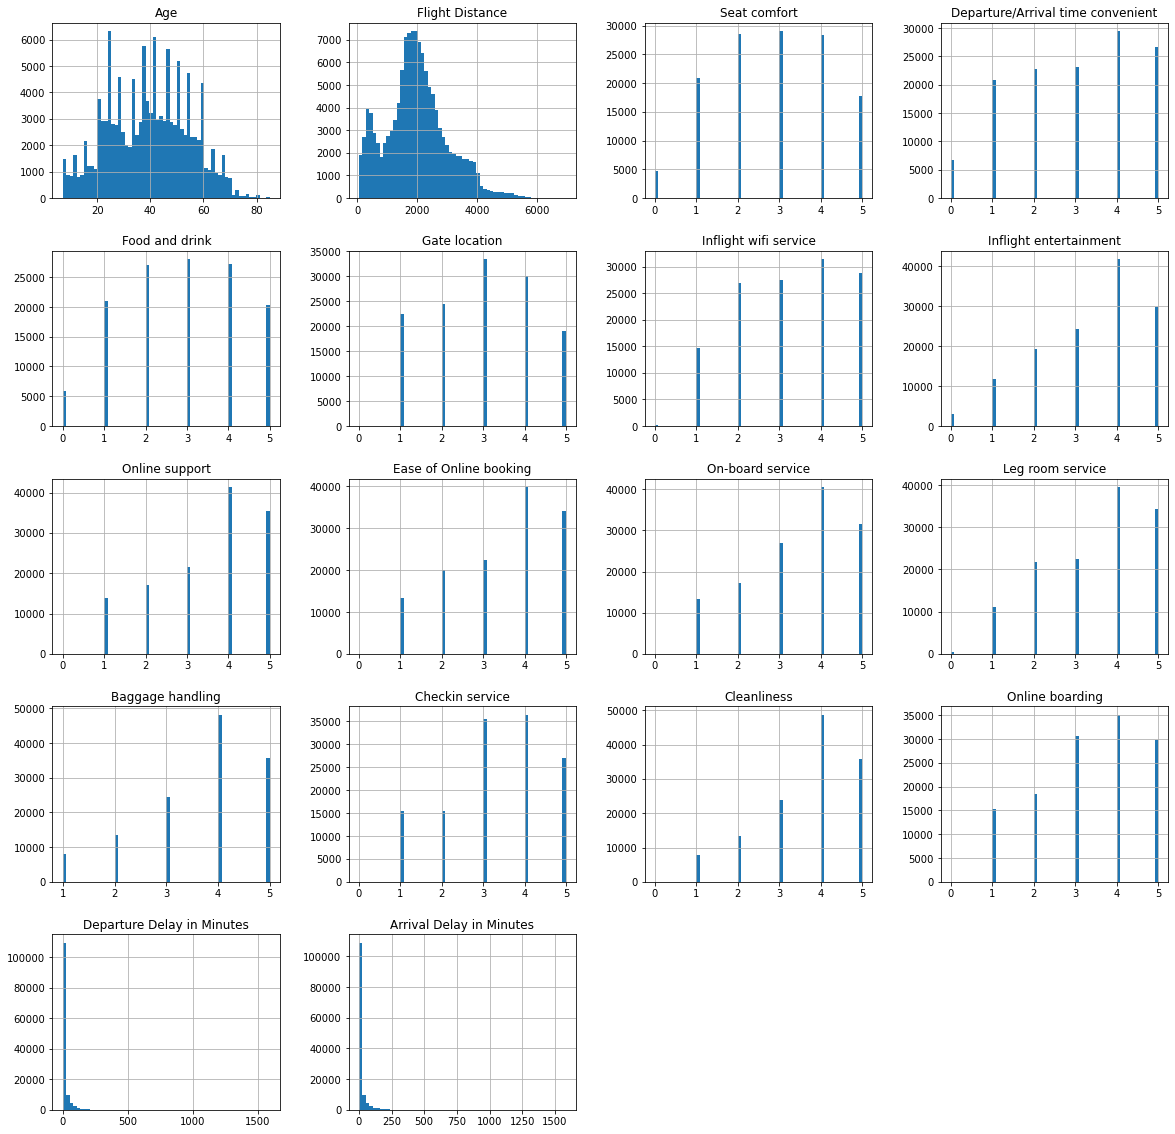

In [12]:
raw_data.hist(figsize=(20,20), bins= 60)

## 2.4.1 Numeric Attributes

In [13]:
raw_data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [14]:
# Import of numeric attributes
numeric_data = raw_data.select_dtypes(include=[np.number])

### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

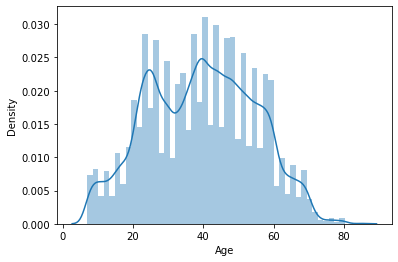

In [15]:
sns.distplot(numeric_data["Age"])

### Seat comfort

<AxesSubplot:xlabel='Seat comfort', ylabel='Density'>

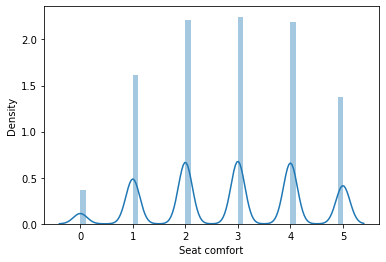

In [16]:
sns.distplot(numeric_data["Seat comfort"])

### Food and Drink

<AxesSubplot:xlabel='Food and drink', ylabel='Density'>

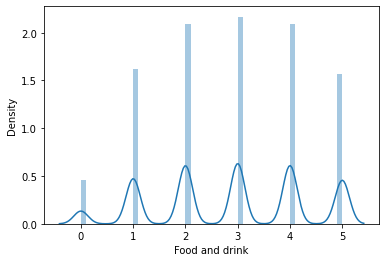

In [17]:
sns.distplot(numeric_data["Food and drink"])

### Inflight wifi service

<AxesSubplot:xlabel='Inflight wifi service', ylabel='Density'>

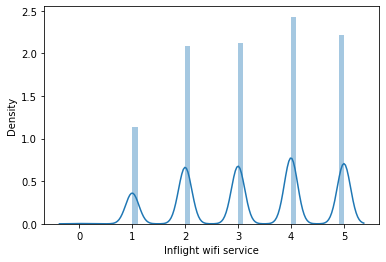

In [18]:
sns.distplot(numeric_data["Inflight wifi service"])

### Inflight entertainment

<AxesSubplot:xlabel='Inflight entertainment', ylabel='Density'>

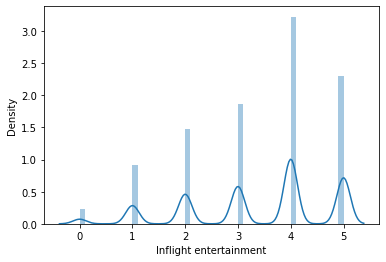

In [19]:
sns.distplot(numeric_data["Inflight entertainment"])

### Online support

<AxesSubplot:xlabel='Online support', ylabel='Density'>

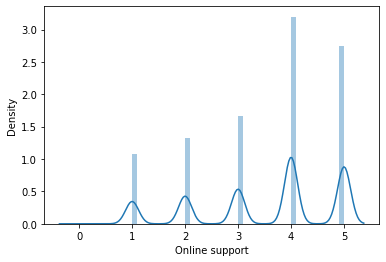

In [20]:
sns.distplot(numeric_data["Online support"])

### Ease of Online booking

<AxesSubplot:xlabel='Ease of Online booking', ylabel='Density'>

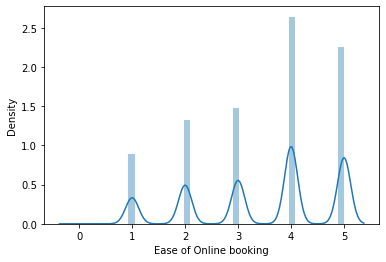

In [21]:
sns.distplot(numeric_data["Ease of Online booking"])

### On-board service

<AxesSubplot:xlabel='On-board service', ylabel='Density'>

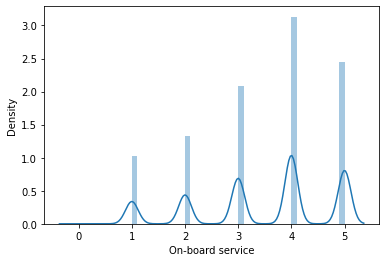

In [22]:
sns.distplot(numeric_data["On-board service"])

### Leg room service

<AxesSubplot:xlabel='Leg room service', ylabel='Density'>

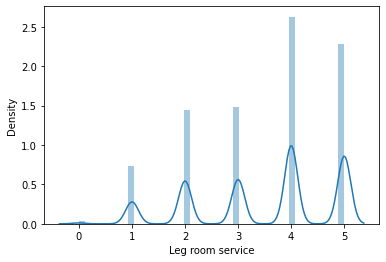

In [23]:
sns.distplot(numeric_data["Leg room service"])

### Baggage handling

<AxesSubplot:xlabel='Baggage handling', ylabel='Density'>

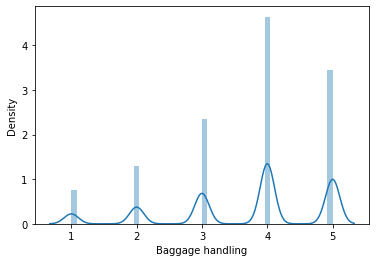

In [24]:
sns.distplot(numeric_data["Baggage handling"])


### Checkin service

<AxesSubplot:xlabel='Checkin service', ylabel='Density'>

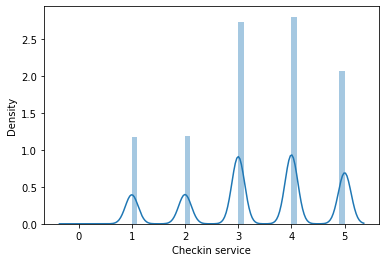

In [25]:
sns.distplot(numeric_data["Checkin service"])

### Cleanliness

<AxesSubplot:xlabel='Cleanliness', ylabel='Density'>

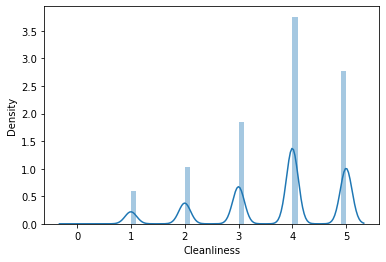

In [26]:
sns.distplot(numeric_data["Cleanliness"])

### Online boarding

<AxesSubplot:xlabel='Online boarding', ylabel='Density'>

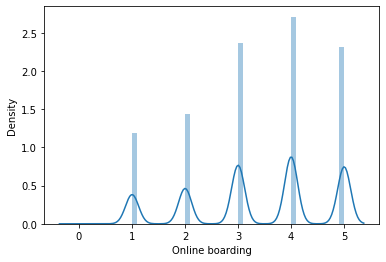

In [27]:
sns.distplot(numeric_data["Online boarding"])

<AxesSubplot:>

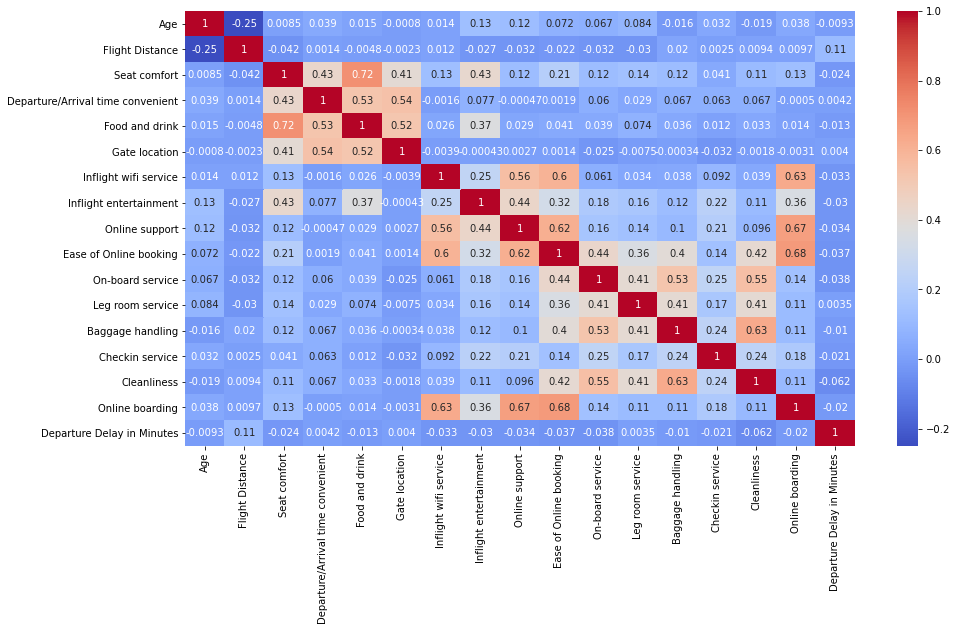

In [28]:
# correlation between numeric variables
fig, ax = plt.subplots(figsize=(15,8))
feature_corr = numeric_data.drop("Arrival Delay in Minutes", axis=1).corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

The correlation matrix shows that the attributes "Flight Distance", "Seat Comfort" and "Age" have a critical positive correlation of over 0.8. This relationship will be re-examined later as part of the multicollinearity and must be removed.

## 2.4.2. Categorical Features

The target variable Satisfaction is mapped to zero (dissatisfied) and one (satisfied) so that a graphical representation can be created with the categorical variables.


In [29]:
raw_data['satisfaction'].describe()

count        129487
unique            2
top       satisfied
freq          70882
Name: satisfaction, dtype: object

In [30]:
category = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
for c in category:
    print ("{} \n".format(raw_data[c].value_counts()))
raw_data['satisfaction']=raw_data['satisfaction'].map({'satisfied':1,'dissatisfied':0})

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64 

Female    65703
Male      63784
Name: Gender, dtype: int64 

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64 

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64 

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64 



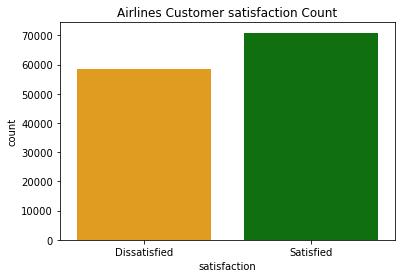

In [31]:
sn.countplot(x="satisfaction", data=raw_data,palette= ["orange","green"])
plt.title('Airlines Customer satisfaction Count')
plt.xticks([0,1],['Dissatisfied',"Satisfied"])
plt.show()

From the graph, we can see that a total of 70000 customers are satisfied with the services of AIRCO Airlines and about 60000 customers are dissatisfied.
The dataset of our target variable is balanced

The categorical attributes are set in relation to the target variable.

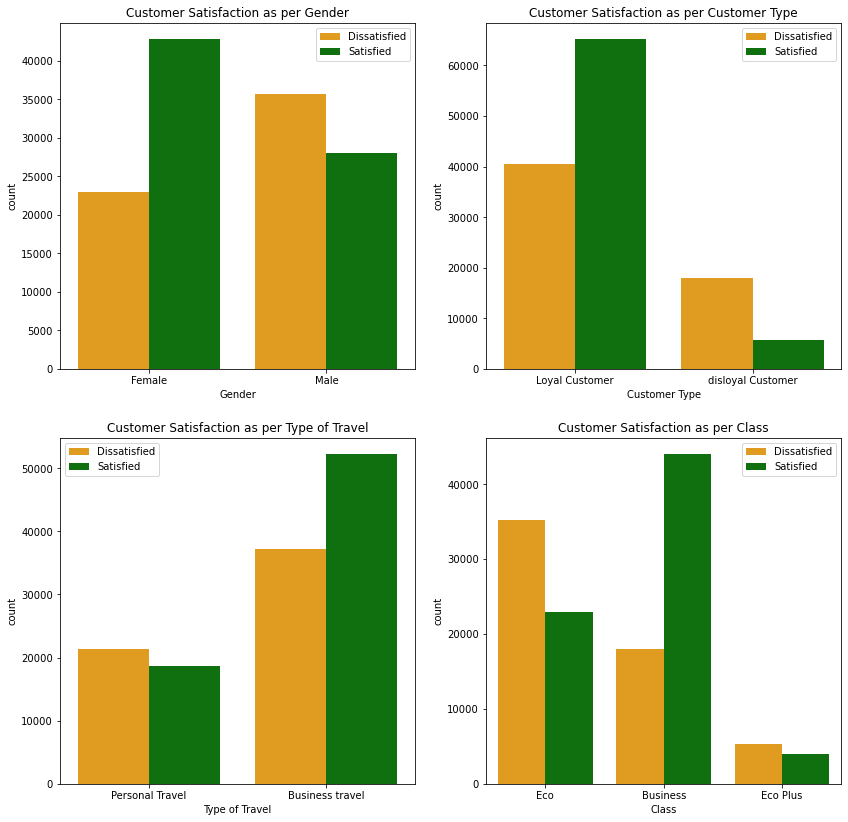

In [32]:
fig,axs = plt.subplots(2,2,figsize=(14, 14))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
  for j in range(2):
    sn.countplot(data=raw_data,x=cols[c],hue='satisfaction',palette= ["orange","green"],ax=axs[i][j])
    axs[i][j].set_title('Customer Satisfaction as per {}'.format(cols[c]))
    axs[i][j].legend(['Dissatisfied',"Satisfied"])
    c+=1

From the above charts we can conclude the following:

Female customers who have flown with AIRCO Airlines are more satisfied than male customers. Loyal customers are more satisfied than unfaithful ones. People who travel for business reasons are more satisfied than those who travel for personal reasons. More customers travel business class and are also more satisfied than those who fly economy class.

## Correlation Analysis

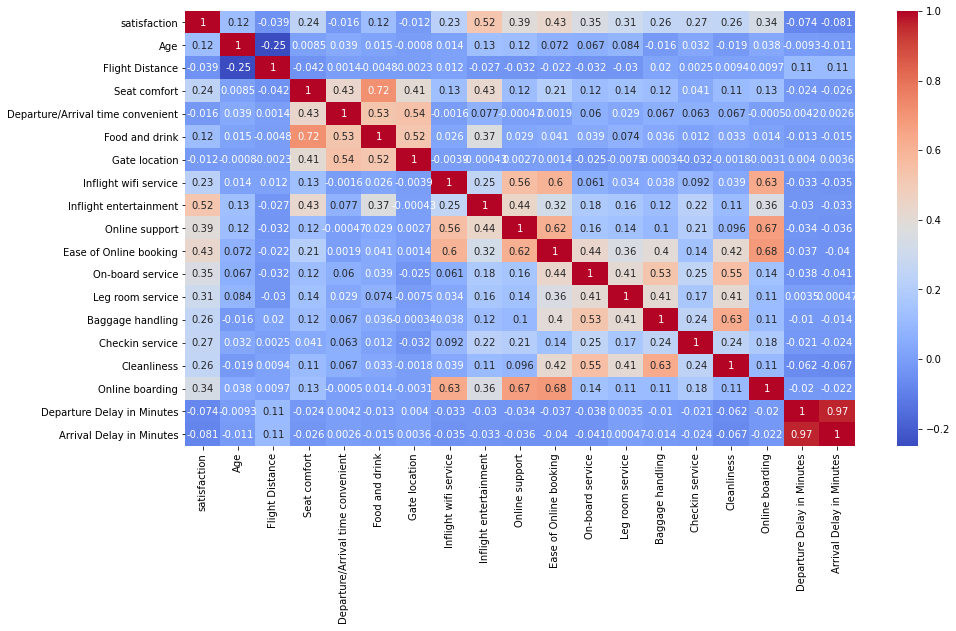

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
sn.heatmap(raw_data.corr(),cmap='coolwarm',annot=True)
plt.show()

Aus den obigen Diagrammen können wir Folgendes schließen:

Weibliche Kunden, die mit AIRCO Airlines geflogen sind, sind zufriedener als männliche Kunden. Loyale Kunden sind zufriedener als untreue Kunden. Personen, die aus geschäftlichen Gründen reisen, sind zufriedener als solche, die aus privaten Gründen reisen. Mehr Kunden reisen in der Business Class und sind auch zufriedener als diejenigen, die in der Economy Class fliegen.

In [34]:
raw_data.drop(['Flight Distance','Departure/Arrival time convenient','Gate location',
               'Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)

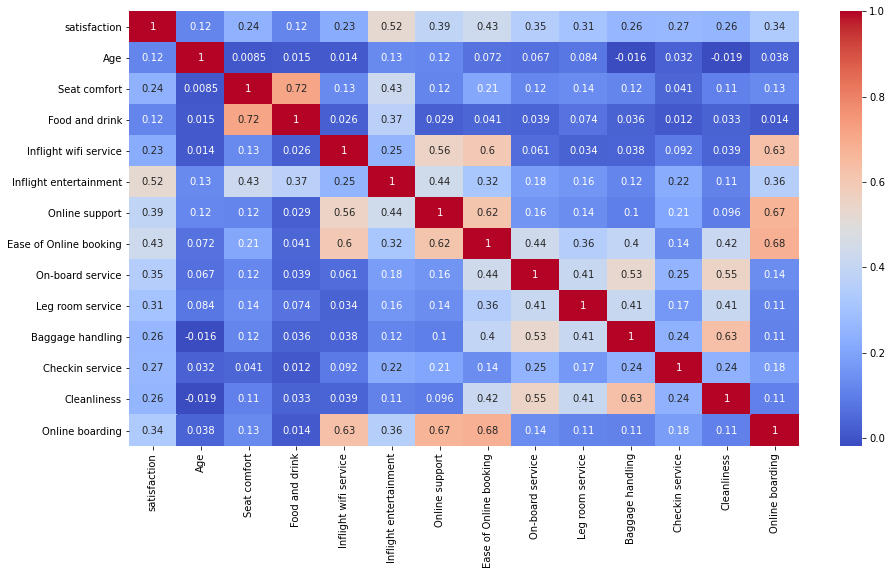

In [35]:
fig, ax = plt.subplots(figsize=(15,8))
sn.heatmap(raw_data.corr(),cmap='coolwarm',annot=True)
plt.show()

# 3. Data Preparation

## 3.1 Target Variable (Satisfaction)

Text(0.5, 1.0, 'satisfied im Vergleich zur dissatisfied')

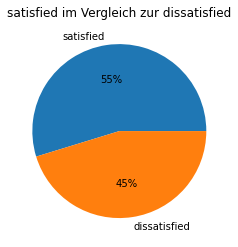

In [36]:
# Generate pie chart for Satisfaction
# Generate percentages
satisfaction_rate =raw_data.satisfaction.value_counts() / len(raw_data.satisfaction)

# Plot preparation
labels = 'satisfied', 'dissatisfied'
fig, ax = plt.subplots()
ax.pie(satisfaction_rate, labels=labels, autopct='%.f%%')  
ax.set_title('satisfied im Vergleich zur dissatisfied')

In [37]:
# Dummy creation
data_enc = pd.get_dummies(raw_data, drop_first=True)
data_enc.head()

,satisfaction,Age,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,65,0,0,2,4,2,3,3,0,3,5,3,2,0,0,1,1,0
1,1,47,0,0,0,2,2,3,4,4,4,2,3,2,1,0,1,0,0
2,1,15,0,0,2,0,2,2,3,3,4,4,4,2,0,0,1,1,0
3,1,60,0,0,3,4,3,1,1,0,1,4,1,3,0,0,1,1,0
4,1,70,0,0,4,3,4,2,2,0,2,4,2,5,0,0,1,1,0


In [38]:
# Zielvariable und Prädiktoren trennen
y = data_enc["satisfaction"]
X = data_enc.drop(labels = ["satisfaction"], axis = 1)

## 3.2. Reoding of Categorical Variables

In [39]:
satisfaction_mapping = {"satisfied": 1,"dissatisfied": 0 }
raw_data['satisfaction']  = raw_data['satisfaction'].map(satisfaction_mapping)

#Mapping Male and Female in number 
Gender_mapping = {"Male": 1,"Female": 2 }
raw_data['Gender']  = raw_data['Gender'].map(Gender_mapping)

#Mapping Loyal and disloyal in number 
Customer_Type_mapping = {"Loyal Customer": 1,"disloyal Customer": 0 }
raw_data['Customer Type']  = raw_data['Customer Type'].map(Customer_Type_mapping)

#Mapping Business travel and Business travel in number 
Type_of_Travel_mapping = {"Business travel": 1,"Personal Travel": 2 }
raw_data['Type of Travel']  = raw_data['Type of Travel'].map(Type_of_Travel_mapping)

#Mapping Business and Eco and Eco plus in number 
Class_mapping = {"Business": 1,"Eco": 3, "Eco Plus": 2 }
raw_data['Class']  = raw_data['Class'].map(Class_mapping)

In [40]:
data_enc.head()

,satisfaction,Age,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,65,0,0,2,4,2,3,3,0,3,5,3,2,0,0,1,1,0
1,1,47,0,0,0,2,2,3,4,4,4,2,3,2,1,0,1,0,0
2,1,15,0,0,2,0,2,2,3,3,4,4,4,2,0,0,1,1,0
3,1,60,0,0,3,4,3,1,1,0,1,4,1,3,0,0,1,1,0
4,1,70,0,0,4,3,4,2,2,0,2,4,2,5,0,0,1,1,0


## 3.3. Test for Multicollinearity

In order to ensure correct operation of the later regression, there must be no multicollinearity between the variables. The presence of the same is checked with the help of the library Statsmodel.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# unabhängige Variablen
vif_test = data_enc.drop("satisfaction", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF für jedes Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                            feature        VIF
0                               Age   7.188491
1                      Seat comfort  12.285935
2                    Food and drink  10.305150
3             Inflight wifi service  13.704495
4            Inflight entertainment  12.675092
5                    Online support  18.920383
6            Ease of Online booking  29.663559
7                  On-board service  14.990944
8                  Leg room service  11.194898
9                  Baggage handling  21.004540
10                  Checkin service   9.552105
11                      Cleanliness  22.375038
12                  Online boarding  20.494307
13                      Gender_Male   1.944395
14  Customer Type_disloyal Customer   1.735878
15   Type of Travel_Personal Travel   2.791512
16                        Class_Eco   3.174314
17                   Class_Eco Plus   1.259395


"Ease of Online booking" has the highest VIF and is removed from the data set.

In [42]:
data_enc.drop("Ease of Online booking", axis=1, inplace=True)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# unabhängige Variablen
vif_test = data_enc.drop("satisfaction", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF für jedes Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                            feature        VIF
0                               Age   7.136461
1                      Seat comfort  12.005266
2                    Food and drink  10.130276
3             Inflight wifi service  12.319654
4            Inflight entertainment  12.550334
5                    Online support  17.935242
6                  On-board service  14.187132
7                  Leg room service  10.964215
8                  Baggage handling  20.620740
9                   Checkin service   9.072649
10                      Cleanliness  21.424792
11                  Online boarding  17.289659
12                      Gender_Male   1.925879
13  Customer Type_disloyal Customer   1.679474
14   Type of Travel_Personal Travel   2.750587
15                        Class_Eco   3.173333
16                   Class_Eco Plus   1.259395


"Cleanliness" now has the highest VIF and is removed from the data set.

In [44]:
data_enc.drop("Cleanliness", axis=1, inplace=True)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# independant variables
vif_test = data_enc.drop("satisfaction", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                            feature        VIF
0                               Age   7.128113
1                      Seat comfort  12.003755
2                    Food and drink  10.124713
3             Inflight wifi service  12.310982
4            Inflight entertainment  12.549643
5                    Online support  17.935093
6                  On-board service  12.975502
7                  Leg room service  10.634109
8                  Baggage handling  16.239889
9                   Checkin service   8.984176
10                  Online boarding  17.284155
11                      Gender_Male   1.918576
12  Customer Type_disloyal Customer   1.663837
13   Type of Travel_Personal Travel   2.741061
14                        Class_Eco   3.173333
15                   Class_Eco Plus   1.259281


"Online support" now has the highest VIF and is removed from the data set.

In [46]:
data_enc.drop("Online support", axis=1, inplace=True)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# independant variables
vif_test = data_enc.drop("satisfaction", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                            feature        VIF
0                               Age   7.017431
1                      Seat comfort  11.989293
2                    Food and drink  10.115398
3             Inflight wifi service  11.435636
4            Inflight entertainment  11.753455
5                  On-board service  12.964521
6                  Leg room service  10.603455
7                  Baggage handling  16.236694
8                   Checkin service   8.919686
9                   Online boarding  14.036032
10                      Gender_Male   1.916824
11  Customer Type_disloyal Customer   1.660199
12   Type of Travel_Personal Travel   2.740816
13                        Class_Eco   3.172096
14                   Class_Eco Plus   1.258892


"Baggage handling" has the highest VIF and will be removed from data frame.

In [48]:
data_enc.drop("Baggage handling", axis=1, inplace=True)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# independant Variables
vif_test = data_enc.drop("satisfaction", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                            feature        VIF
0                               Age   6.989177
1                      Seat comfort  11.963822
2                    Food and drink  10.111828
3             Inflight wifi service  11.424106
4            Inflight entertainment  11.748013
5                  On-board service  10.441115
6                  Leg room service   9.657004
7                   Checkin service   8.675751
8                   Online boarding  14.002870
9                       Gender_Male   1.898877
10  Customer Type_disloyal Customer   1.618749
11   Type of Travel_Personal Travel   2.720724
12                        Class_Eco   3.171792
13                   Class_Eco Plus   1.258871


"Seat comfort" has now the highest VIF und will be removed frome data frame.

In [50]:
data_enc.drop("Seat comfort", axis=1, inplace=True)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# independant Variables
vif_test = data_enc.drop("satisfaction", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                            feature        VIF
0                               Age   6.969770
1                    Food and drink   5.547879
2             Inflight wifi service  11.395303
3            Inflight entertainment  11.175782
4                  On-board service  10.385238
5                  Leg room service   9.628200
6                   Checkin service   8.650901
7                   Online boarding  13.996517
8                       Gender_Male   1.898628
9   Customer Type_disloyal Customer   1.618041
10   Type of Travel_Personal Travel   2.720031
11                        Class_Eco   3.115371
12                   Class_Eco Plus   1.247721


"Inflight wifi service" has now the highest VIF and will be removed from data frame.

In [52]:
data_enc.drop("Inflight wifi service", axis=1, inplace=True)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# independant Variables
vif_test = data_enc.drop("satisfaction", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                            feature        VIF
0                               Age   6.924388
1                    Food and drink   5.533447
2            Inflight entertainment  11.108155
3                  On-board service  10.375790
4                  Leg room service   9.627567
5                   Checkin service   8.644883
6                   Online boarding   8.431370
7                       Gender_Male   1.893089
8   Customer Type_disloyal Customer   1.614883
9    Type of Travel_Personal Travel   2.719222
10                        Class_Eco   3.099101
11                   Class_Eco Plus   1.244339


"Inflight entertainment" has now the highest VIF and will be removed from data frame.

In [54]:
data_enc.drop("Inflight entertainment", axis=1, inplace=True)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# independant Variables
vif_test = data_enc.drop("satisfaction", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                            feature        VIF
0                               Age   6.790904
1                    Food and drink   4.449850
2                  On-board service  10.276622
3                  Leg room service   9.586087
4                   Checkin service   8.282892
5                   Online boarding   7.159296
6                       Gender_Male   1.877273
7   Customer Type_disloyal Customer   1.579504
8    Type of Travel_Personal Travel   2.709785
9                         Class_Eco   3.089164
10                   Class_Eco Plus   1.241904


"On-board service" has now the highest VIF and will be removed from data frame.

In [56]:
data_enc.drop("On-board service", axis=1, inplace=True)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# independant Variables
vif_test = data_enc.drop("satisfaction", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                           feature       VIF
0                              Age  6.633037
1                   Food and drink  4.414697
2                 Leg room service  7.663977
3                  Checkin service  7.770483
4                  Online boarding  6.979633
5                      Gender_Male  1.875789
6  Customer Type_disloyal Customer  1.568764
7   Type of Travel_Personal Travel  2.683712
8                        Class_Eco  3.074457
9                   Class_Eco Plus  1.239386


Non of the variables now has a VIF higer than 10.

## 3.4. Feature Scaling

In [58]:
# seperation of target variable and predictors
y = data_enc["satisfaction"]
X = data_enc.drop(labels = ["satisfaction"], axis = 1)

In [59]:
from sklearn.preprocessing import StandardScaler
num_features = ['Age']

scaler = StandardScaler()

X[num_features] = scaler.fit_transform(X[num_features])
X.head()

,Age,Food and drink,Leg room service,Checkin service,Online boarding,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1.691495,0,0,5,2,0,0,1,1,0
1,0.500825,0,4,2,2,1,0,1,0,0
2,-1.615922,0,3,4,2,0,0,1,1,0
3,1.360753,0,0,4,3,0,0,1,1,0
4,2.022237,0,0,4,5,0,0,1,1,0


## 3.5. Create Test and Training Data

In [60]:
# Seperation in test and training data
# default of 80% to 20% 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110)

# 4. Modelling and Evaluation

## 4.1. Logistic Regression


Logistic regression is used to solve the problem. The two libraries Statsmodels and Scikit-Learn are used for this. The complete evaluation of the model takes place only in the subchapter to Scikit-Learn.

In [61]:
# Seperation in test and training data
# default of 80% to 20% 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110)

In [62]:
# add constant
X_const = sm.add_constant(X_train)
# create Modell 
log_reg = sm.Logit(y_train, X_const).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.470147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                97115
Model:                          Logit   Df Residuals:                    97104
Method:                           MLE   Df Model:                           10
Date:                Fri, 07 Jan 2022   Pseudo R-squ.:                  0.3172
Time:                        18:39:20   Log-Likelihood:                -45658.
converged:                       True   LL-Null:                       -66872.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.0555      0.043    -70.903  

The trained model shows statistically non-significant variables. This is given if the value P>|z| is greater than 0.05 and it is not the constant.

In [63]:
# Removal of statistically non-significant features (P>|z|> 0.05).
insignificant_features = ["Food and drink", "Leg room service", "Online boarding"]
X_train.drop(insignificant_features, axis=1, inplace=True)
X_test.drop(insignificant_features, axis=1, inplace=True)

Now a second modell can be created.

In [64]:
# new Modell
X_const = sm.add_constant(X_train)
log_reg2 = sm.Logit(y_train, X_const).fit() 
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.536087
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                97115
Model:                          Logit   Df Residuals:                    97107
Method:                           MLE   Df Model:                            7
Date:                Fri, 07 Jan 2022   Pseudo R-squ.:                  0.2215
Time:                        18:39:21   Log-Likelihood:                -52062.
converged:                       True   LL-Null:                       -66872.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2853      0.025     11.455  

There is still one non-significant variable 

In [65]:
# Entfernen der statistisch nicht signifikanten Features (P>|z|> 0.05)
insignificant_features = ["Checkin service"]
X_train.drop(insignificant_features, axis=1, inplace=True)
X_test.drop(insignificant_features, axis=1, inplace=True)

Now a third modell can be created.

In [66]:
# new Modell
X_const = sm.add_constant(X_train)
log_reg2 = sm.Logit(y_train, X_const).fit() 
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.567816
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                97115
Model:                          Logit   Df Residuals:                    97108
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Jan 2022   Pseudo R-squ.:                  0.1754
Time:                        18:39:24   Log-Likelihood:                -55143.
converged:                       True   LL-Null:                       -66872.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.8518      0.016    119.179  

No non-signifikanten Variables anymore. The final Modell is created.

In [67]:
# Finale Modell
X_const = sm.add_constant(X_train)
log_reg_final = sm.Logit(y_train, X_const).fit() 
print(log_reg_final.summary())

Optimization terminated successfully.
         Current function value: 0.567816
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                97115
Model:                          Logit   Df Residuals:                    97108
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Jan 2022   Pseudo R-squ.:                  0.1754
Time:                        18:39:25   Log-Likelihood:                -55143.
converged:                       True   LL-Null:                       -66872.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.8518      0.016    119.179  

In [68]:
# prediction
y_hat = log_reg_final.predict(sm.add_constant(X_test)) 
# Statsmodel only gives the probabilities, so rounding is required.  
prediction = list(map(round, y_hat))

## 4.2. Evaluation

Zur Evaluation sollen mehrere Metriken verwendet werden, die komfortabler mittels Scikit-Learn erzeugt werden können. Deshalb wird das identische Modell wie mit Statsmodels nochmals in Scikit-Learn erzeugt.

## Scikit-Learn

 ## Training und Vorhersage

In [69]:
from sklearn.linear_model import LogisticRegression
# C wird benötigt um das exakt selbe Modell zu bilden, wie mit Statsmodels; Quelle: https://www.kdnuggets.com/2016/06/regularization-logistic-regression.html
logistic_model = LogisticRegression(random_state=0, C=1e8)

In [70]:
# Vorhersage auf Testdaten
result = logistic_model.fit(X_train,y_train)
prediction_test = logistic_model.predict(X_test)
prediction_train = logistic_model.predict(X_train)

## Evaluation

In [71]:
from sklearn import metrics

# Accuracy Score ermitteln
acc = metrics.accuracy_score(y_test, prediction_test)
print('Accuracy auf dem Testdatensatz: {}'.format(acc))

Accuracy auf dem Testdatensatz: 0.7619238848387495


Die Accuracy suggiert ein überdurchschnittlich gutes Modell. Es handelt sich aber um einen balanciert Datensatz. 

In [72]:
# Klassifikations Report
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


print("Trainingsdaten:")
print(classification_report(y_train,prediction_train))
print("Testdaten:")
print(classification_report(y_test,prediction_test))

Trainingsdaten:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71     43923
           1       0.75      0.84      0.79     53192

    accuracy                           0.76     97115
   macro avg       0.76      0.75      0.75     97115
weighted avg       0.76      0.76      0.76     97115

Testdaten:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72     14682
           1       0.75      0.84      0.79     17690

    accuracy                           0.76     32372
   macro avg       0.76      0.75      0.76     32372
weighted avg       0.76      0.76      0.76     32372



Text(0.5, 42.0, 'Predicted label')

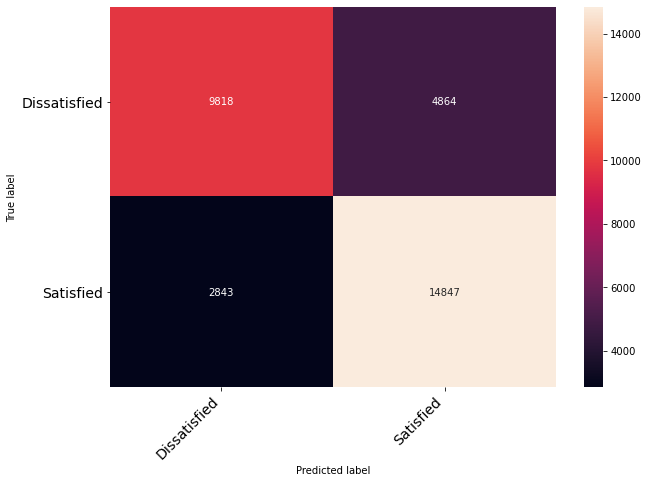

In [73]:
# Confusion-Matrix Testdaten
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction_test)
df_cm = pd.DataFrame(cm, index=['Dissatisfied','Satisfied'], columns=['Dissatisfied', 'Satisfied'],)
fig = plt.figure(figsize=[10,7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [74]:
# Metriken aus Konfusionsmatrix auslesen 
tn, fp, fn, tp = cm.ravel()
recall = tp/(fn+tp)
precision = tp/(tp+fp)
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print("True Positives: " + str(tp))
print("Recall: " + str(recall))
print("Precision: " + str(precision))

True Negatives: 9818
False Positives: 4864
False Negatives: 2843
True Positives: 14847
Recall: 0.839287733182589
Precision: 0.7532342346912891


Precision und Recall bieten ein deutlich realistischeres Bild des Modells. Es erzielt eine Precision von rund 75% und einen Recall von 84%. Der Recall ist für den Anwendungsfall deutlich wichtiger und muss nicht in dem Fall verbessert werden.

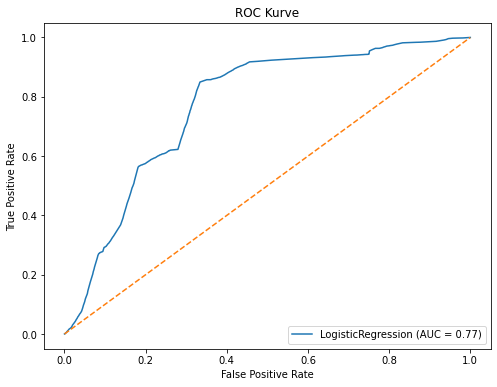

In [75]:
# ROC-Kurve, AUC
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('ROC Kurve')
plot = metrics.plot_roc_curve(logistic_model, X_test, y_test, ax=ax);
ax.plot([0,1], [0,1], '--');

Die AUC der ROC-Kurve liefert einen guten Wert von 0,77 Daraus lässt sich schließen, dass durch Optimierungen des Thresholds Optimierungspotential besteht.

## 4.3. Interpretation

First, however, the results for the business are to be illustrated and clarified, which service would lead to a customer satisfaction and which speak against the customer satisfaction.

In [76]:
# Read out regression coefficients and thus find out importance of individual attributes
weights = pd.Series(logistic_model.coef_[0],
 index=X_train.columns.values)
weights.sort_values(ascending = False)

Age                               -0.003849
Type of Travel_Personal Travel    -0.255720
Gender_Male                       -1.120784
Class_Eco                         -1.236491
Class_Eco Plus                    -1.328422
Customer Type_disloyal Customer   -1.909557
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


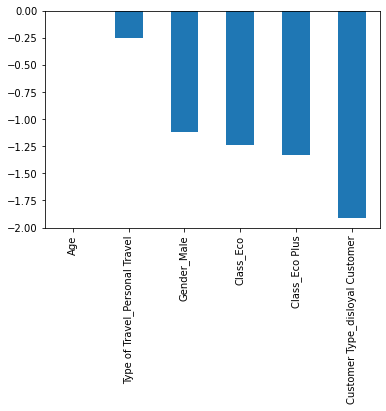

In [77]:
# Graphical representation of the most important features that lead to customer satisfaction
weights = pd.Series(logistic_model.coef_[0],
                 index=X_train.columns.values)
print (weights.sort_values(ascending = False)[:7].plot(kind='bar'))

The three most important features that lead to customer satisfaction are:

The Customer Type_disloyal Customer
the Class Eco Plus and
the Class Eco

AxesSubplot(0.125,0.125;0.775x0.755)


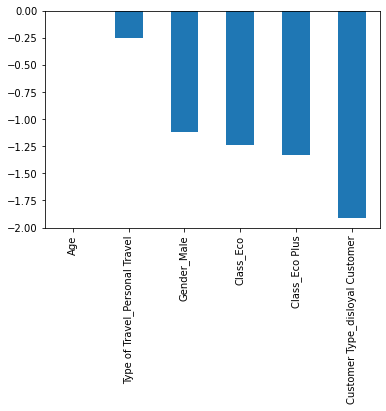

In [78]:
# Most important features that lead customers from a customer dissatisfaction
print(weights.sort_values(ascending = False)[-8:].plot(kind='bar'))

The three most important features that lead to customer dissatisfaction

The age
Type of Travel_Personal Travel
Gender Male

## 4.4. Model Optimization

The recall rate is too low as a target metric and must therefore be increased. Therefore, the metrics are analyzed at different thresholds of the logistic regression.

In [79]:
# Testing the metrics at different thresholds
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
pred_proba_df = y_hat
for i in threshold_list:
    print ('\n******** Für einen Schwellenwert von {} ******'.format(i))
    # Round up if value is above threshold
    y_test_pred = pred_proba_df.apply(lambda x: 1 if x>i else 0)
    # read metrics
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy: {}".format(test_accuracy))
    # Confusion matrix
    c = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = c.ravel()
    recall = tp/(fn+tp)
    precision = tp/(tp+fp)
    # print metrics
    print("True Negatives: " + str(tn))
    print("False Positives: " + str(fp))
    print("False Negatives: " + str(fn))
    print("True Positives: " + str(tp))
    print("Recall: " + str(recall))
    print("Precision: " + str(precision))


******** Für einen Schwellenwert von 0.05 ******
Accuracy: 0.5464599036204127
True Negatives: 0
False Positives: 14682
False Negatives: 0
True Positives: 17690
Recall: 1.0
Precision: 0.5464599036204127

******** Für einen Schwellenwert von 0.1 ******
Accuracy: 0.5809650315087113
True Negatives: 1360
False Positives: 13322
False Negatives: 243
True Positives: 17447
Recall: 0.9862634256642171
Precision: 0.5670317527381455

******** Für einen Schwellenwert von 0.15 ******
Accuracy: 0.5809650315087113
True Negatives: 1360
False Positives: 13322
False Negatives: 243
True Positives: 17447
Recall: 0.9862634256642171
Precision: 0.5670317527381455

******** Für einen Schwellenwert von 0.2 ******
Accuracy: 0.5825404670703077
True Negatives: 1418
False Positives: 13264
False Negatives: 250
True Positives: 17440
Recall: 0.9858677218767665
Precision: 0.5680041688379365

******** Für einen Schwellenwert von 0.25 ******
Accuracy: 0.6289385889039911
True Negatives: 3675
False Positives: 11007
False N

# 5. Deployment

In [80]:
# seperate individual (scaled) customer
customer_df = X_test.iloc[896]

In [81]:
# overview about the customer
customer_df

Age                               -0.028362
Gender_Male                        0.000000
Customer Type_disloyal Customer    0.000000
Type of Travel_Personal Travel     0.000000
Class_Eco                          0.000000
Class_Eco Plus                     0.000000
Name: 94290, dtype: float64

In [82]:
# Run Prediction
cust_pred = logistic_model.predict([customer_df])

In [83]:
# interprate result
def check_prediction(pred):
    if pred[0] == 1:
        print("Der Kunde wird vermutlich unzufrieden sein! Customer Relationship Management informieren!")
    else:
        print("Der Kunde wird vermutlich zufrieden sein.")

In [84]:
check_prediction(cust_pred)

Der Kunde wird vermutlich unzufrieden sein! Customer Relationship Management informieren!
